In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
path = r'/Users/yourname/Datasets'

In [3]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(os.path.join(path, 'iris.csv'), index_col = False, header=None, names=col_names)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#map each iris species number to a name with a dictionary.
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['species_name'] = [iris_class[i] for i in df_iris.species]
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica


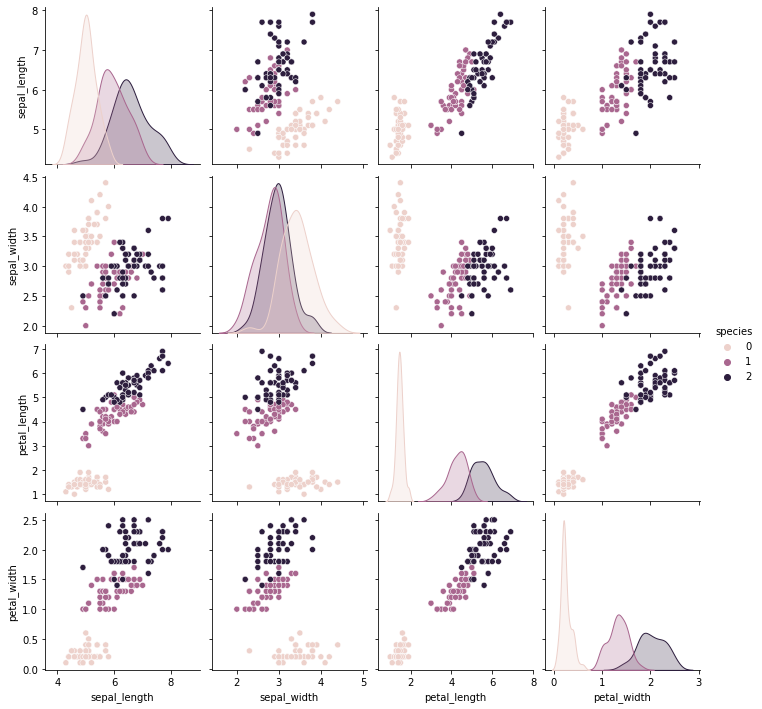

In [5]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [6]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_iris.drop(['species', 'species_name'], axis=1)
y = df_iris.species
print(X.shape)
print(y.shape)
X

(150, 4)
(150,)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [9]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [10]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9666666666666667


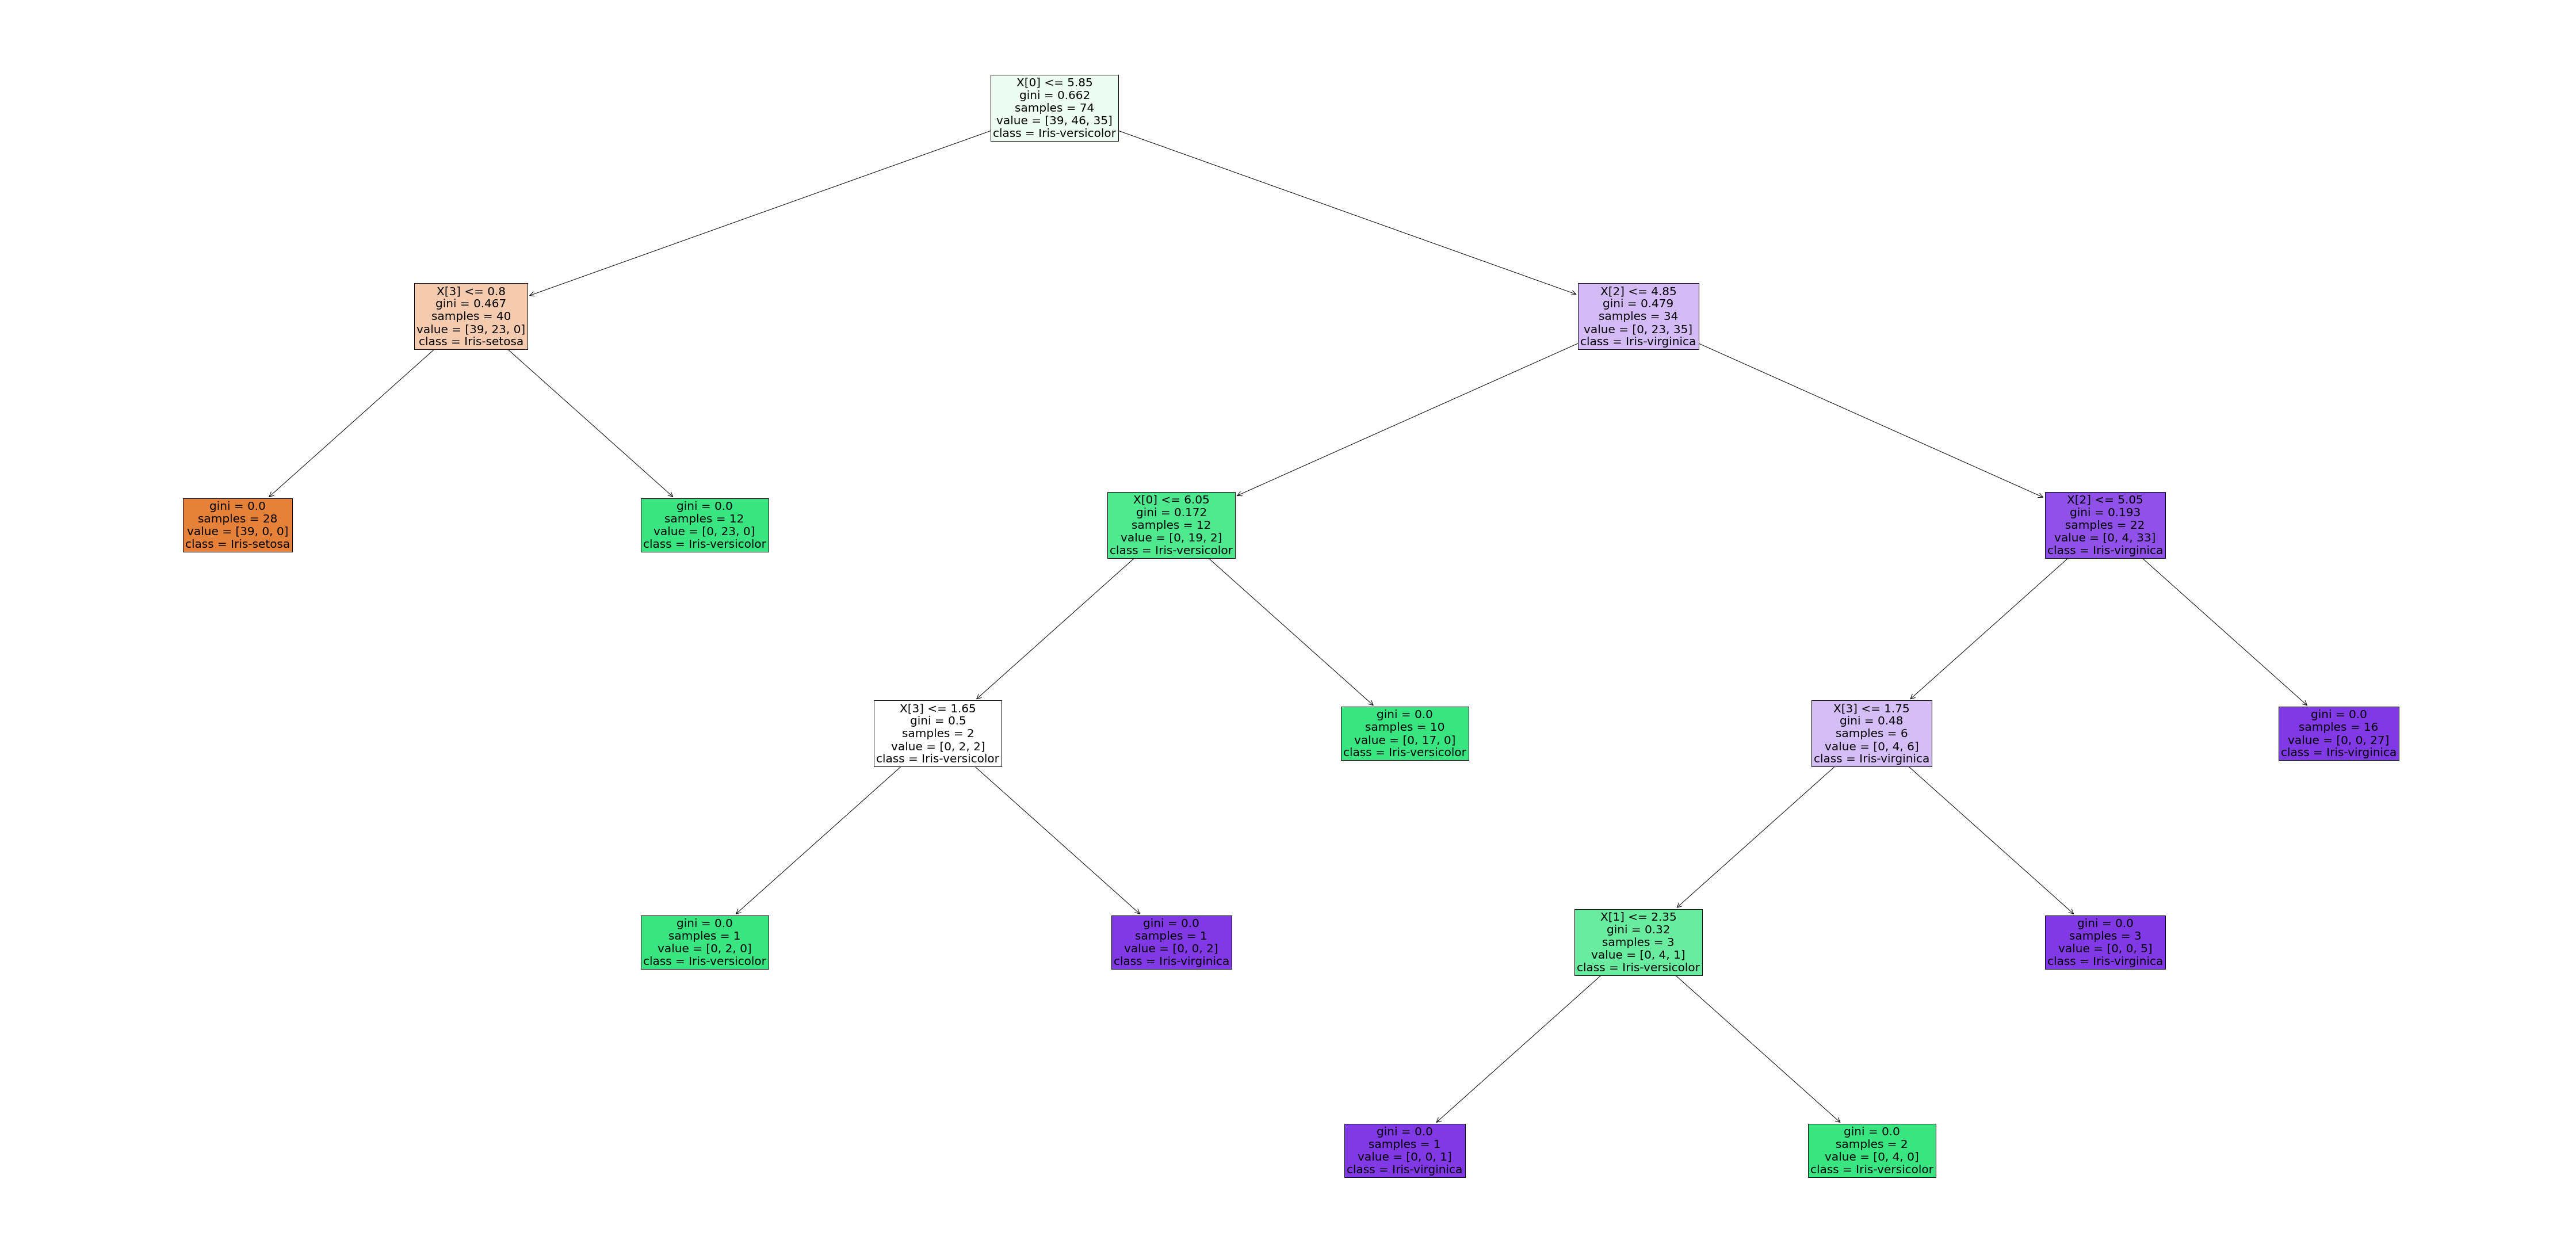

In [11]:
types = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

In [12]:
fig.savefig(f"{path}/decision_tree1.png")

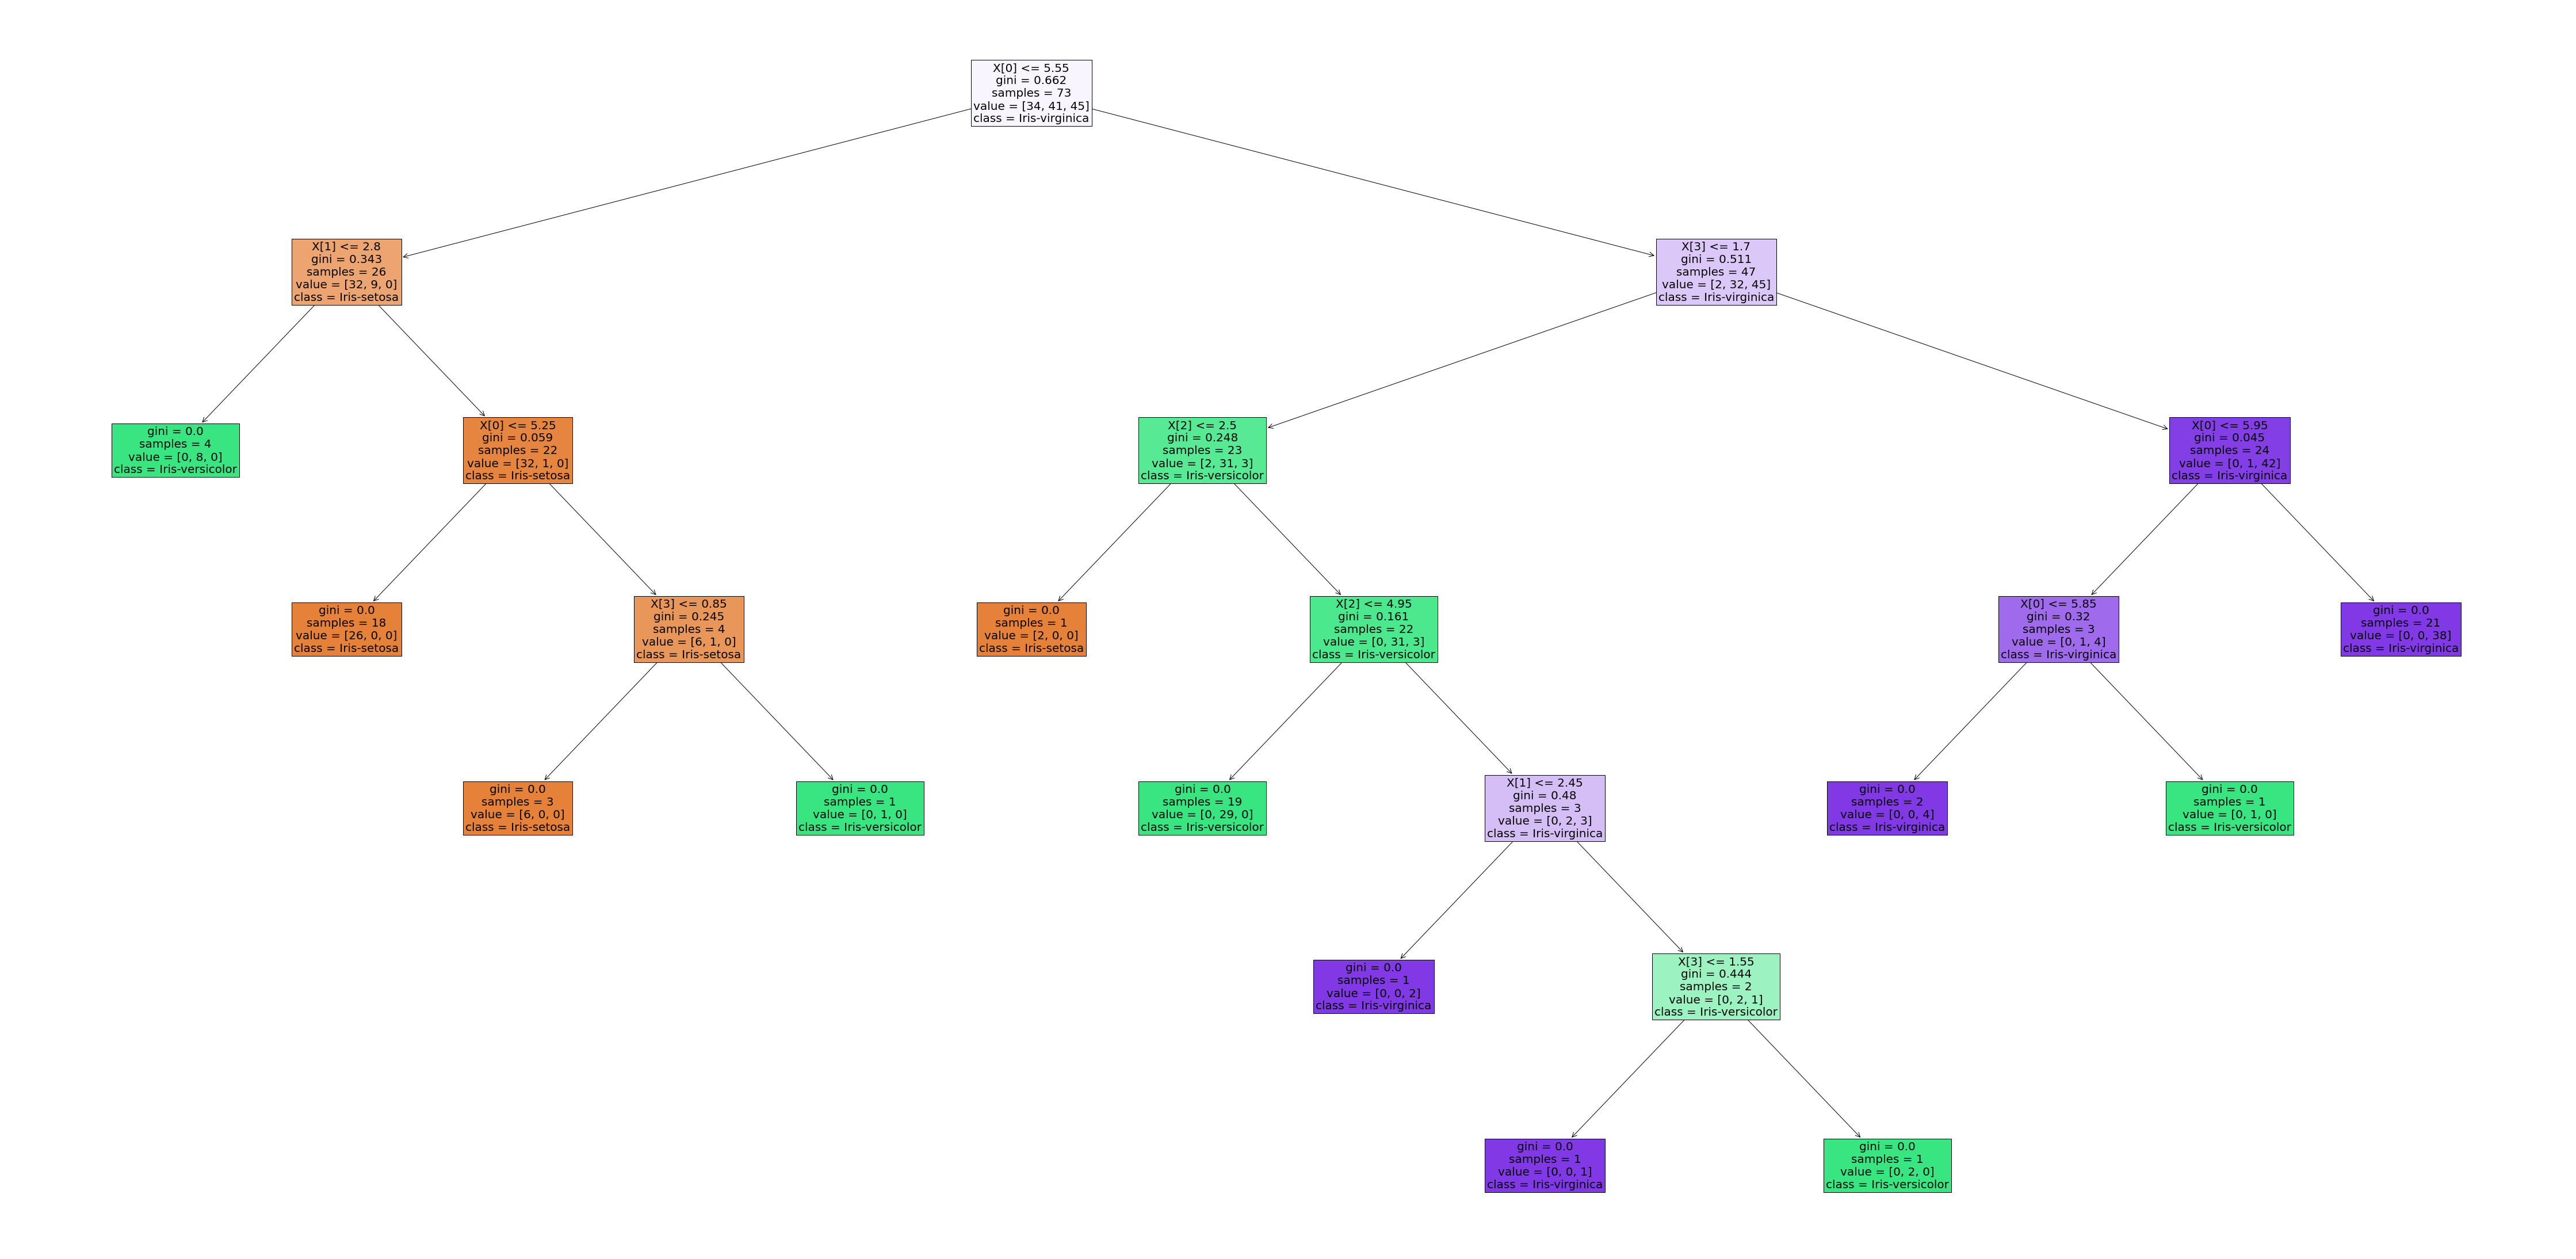

In [13]:
types = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[25], fontsize = 20, class_names=types, filled=True);

In [14]:
fig.savefig(f"{path}/decision_tree2.png")

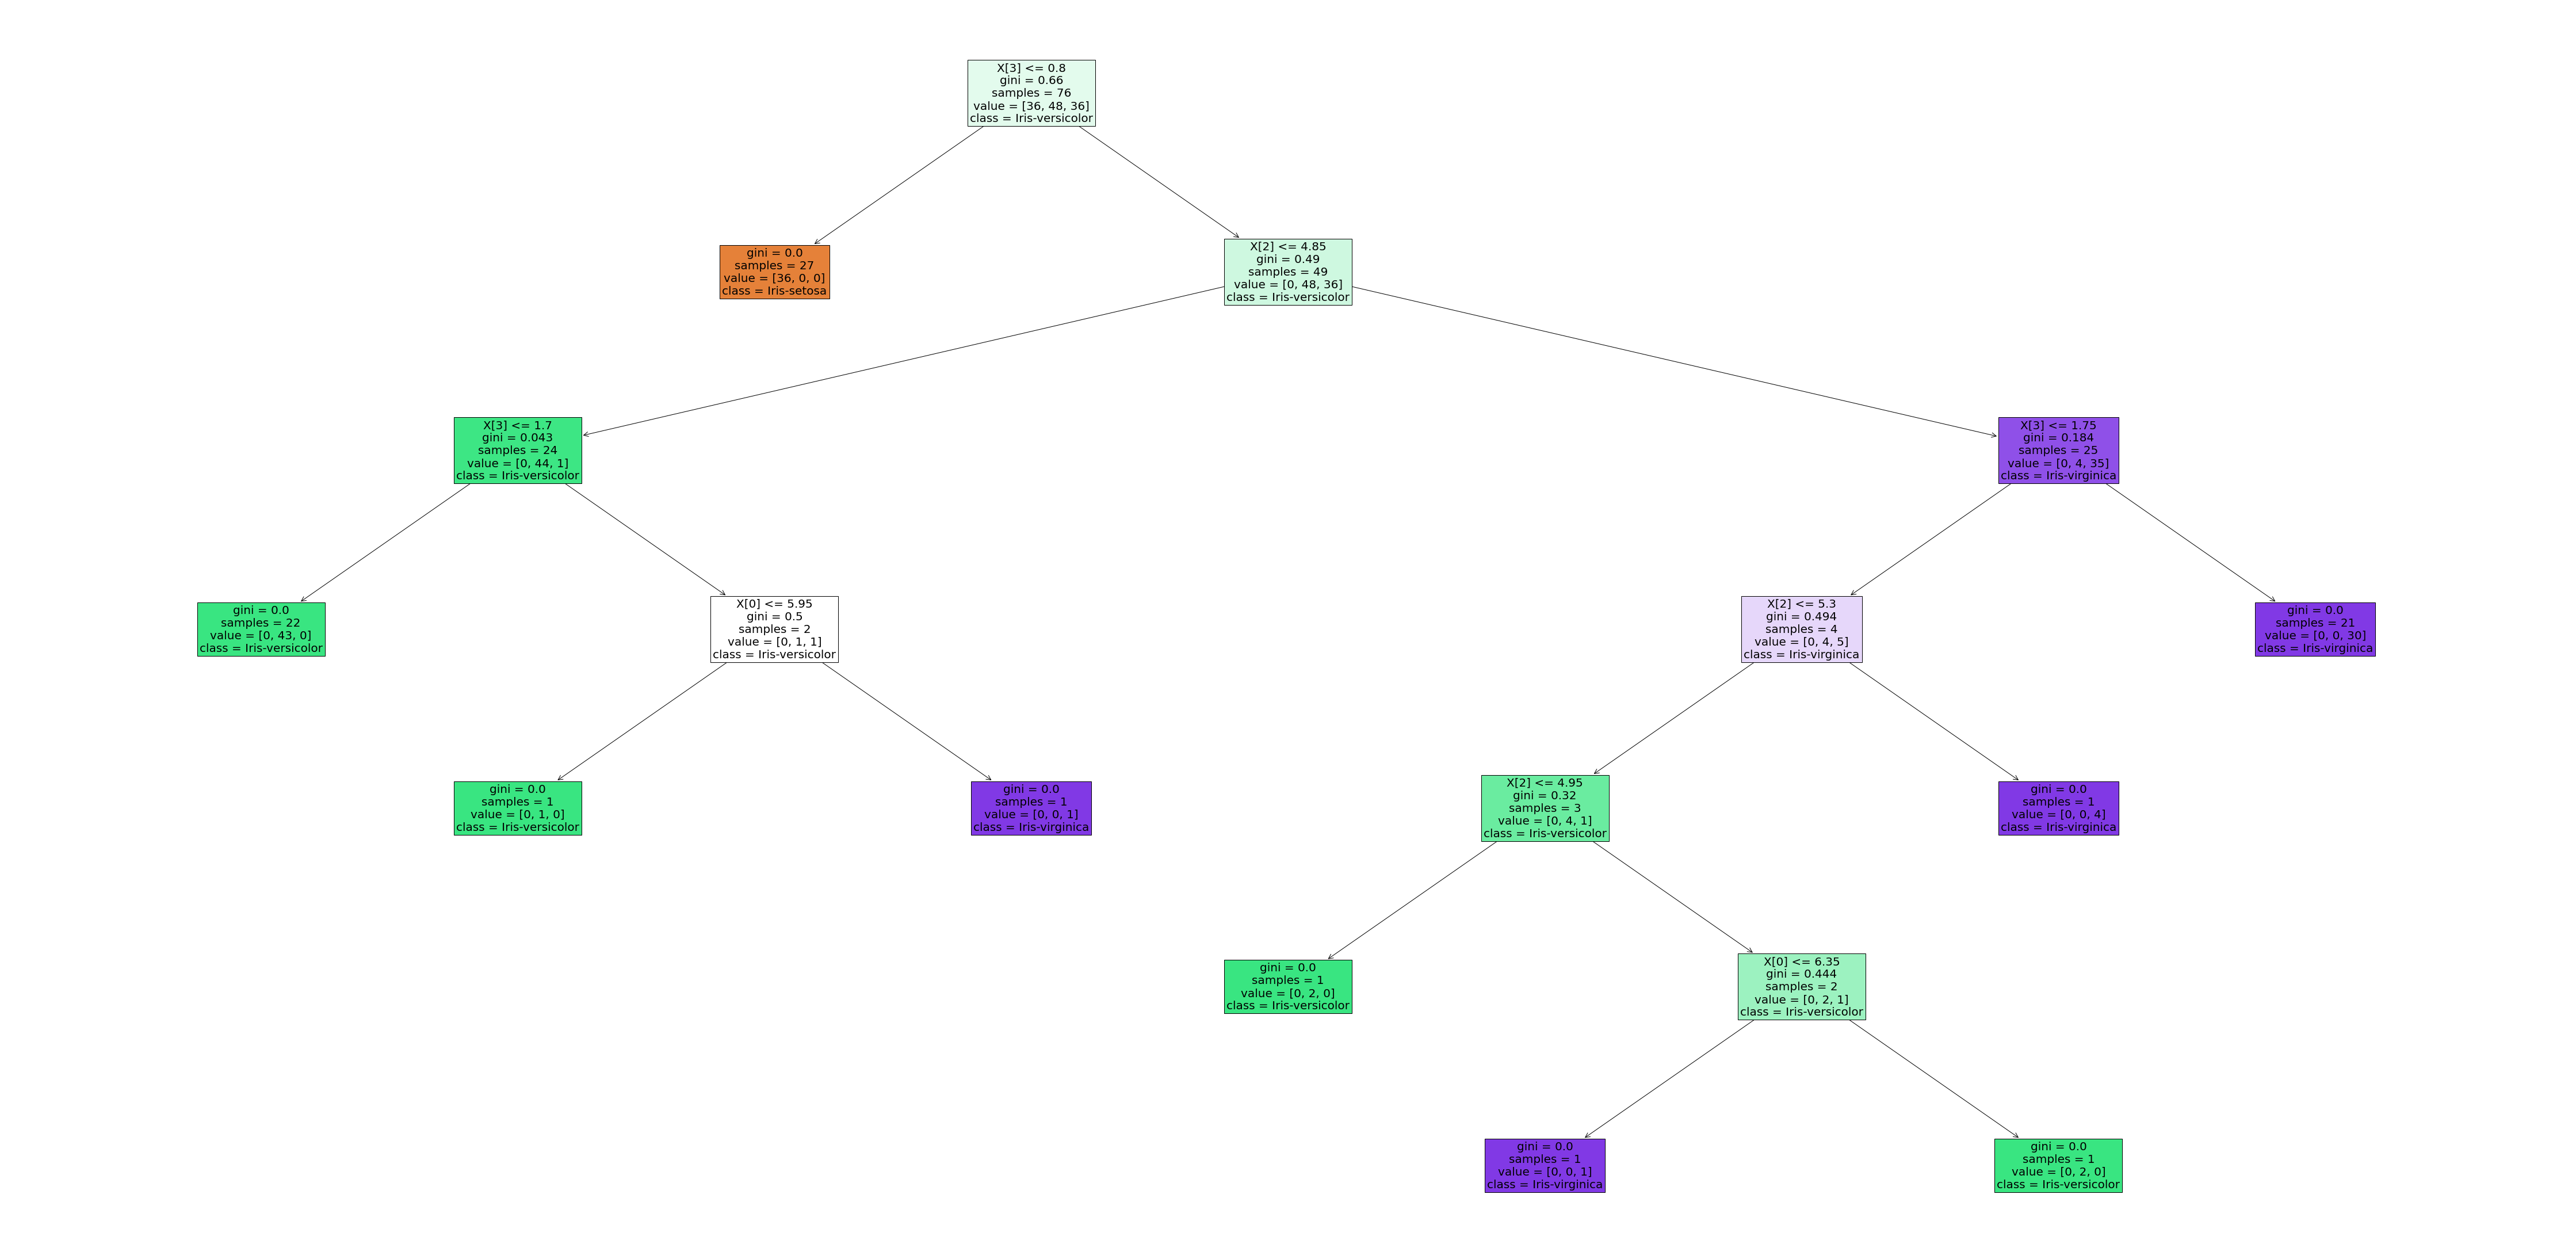

In [15]:
types = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[82], fontsize = 20, class_names=types, filled=True);

In [16]:
fig.savefig(f"{path}/decision_tree3.png")

In [21]:
important = pd.Series(clf.feature_importances_, index = X.columns) #.sort_values(ascending = False)
important

sepal_length    0.095618
sepal_width     0.027558
petal_length    0.473079
petal_width     0.403745
dtype: float64

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


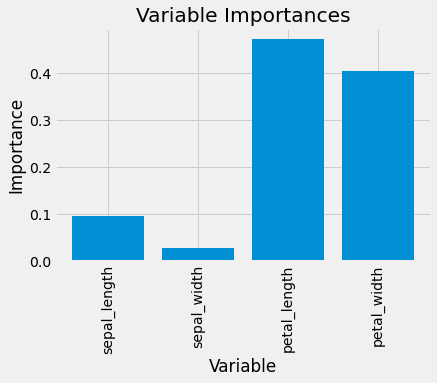

In [22]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(X.columns)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, X.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');